In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime, date

In [6]:
boys_stunted_df = pd.read_csv("./converted data/boys_stunted.csv")
boys_underweight_df = pd.read_csv("./converted data/boys_underweight.csv")
boys_wasted_df = pd.read_csv("./converted data/boys_wasted.csv")

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# plt.style.available

In [8]:
def trend_plot(df, time_col, value_cols, title):
    df[time_col] = pd.to_numeric(df[time_col], errors='coerce')
    df = df.dropna(subset=[time_col])
    
    plt.figure(figsize=(12, 6))
    for col in value_cols:
        plt.plot(df[time_col], df[col], label=col, marker='o', markersize=3)
    plt.title(title)
    plt.xlabel(time_col)
    plt.ylabel("%")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def print_trend(df, time_col, value_cols, title):
    print(f"\n--- {title} ---")
    for col in value_cols:
        slope, _, _, p, _ = stats.linregress(df[time_col], df[col])
        trend = "Increasing" if slope > 0 else "Decreasing"
        sig = "(Significant)" if p < 0.05 else "(Not Significant)"
        print(f"{col}: {trend} {sig} (p={p:.4f})")



Stunting


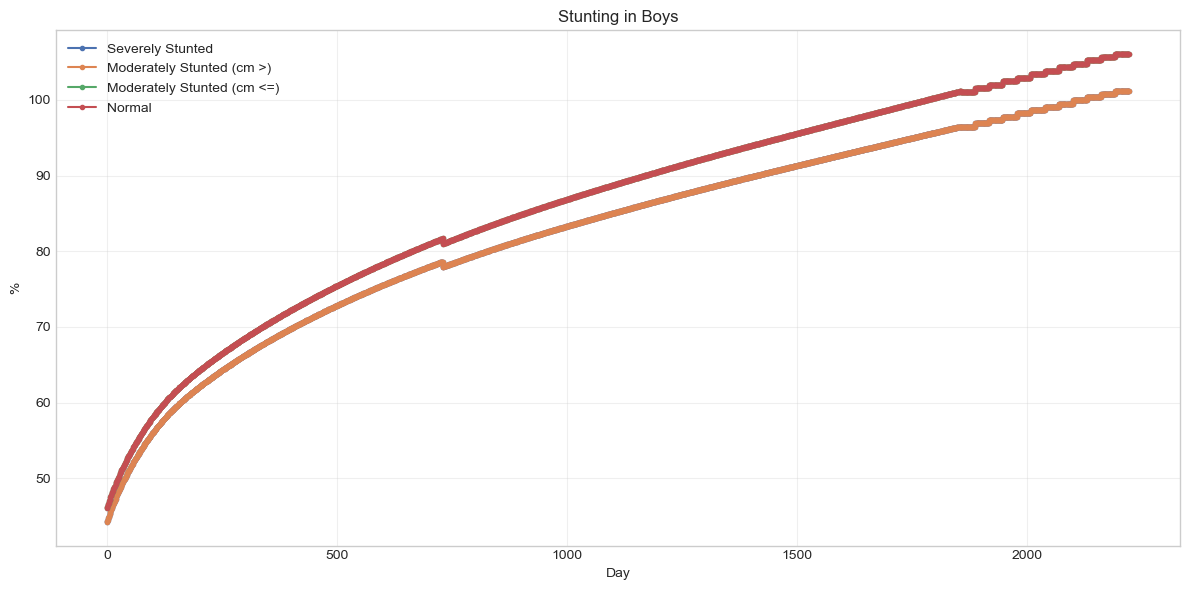


--- Stunting ---
Severely Stunted: Increasing (Significant) (p=0.0000)
Moderately Stunted (cm >): Increasing (Significant) (p=0.0000)
Moderately Stunted (cm <=): Increasing (Significant) (p=0.0000)
Normal: Increasing (Significant) (p=0.0000)


In [9]:
# --- Apply to Each Dataset ---
print("\nStunting")
stunt_cols = ['Severely Stunted', 'Moderately Stunted (cm >)', 'Moderately Stunted (cm <=)', 'Normal']
trend_plot(boys_stunted_df, 'Day', stunt_cols, "Stunting in Boys")
print_trend(boys_stunted_df, 'Day', stunt_cols, "Stunting")


Underweight


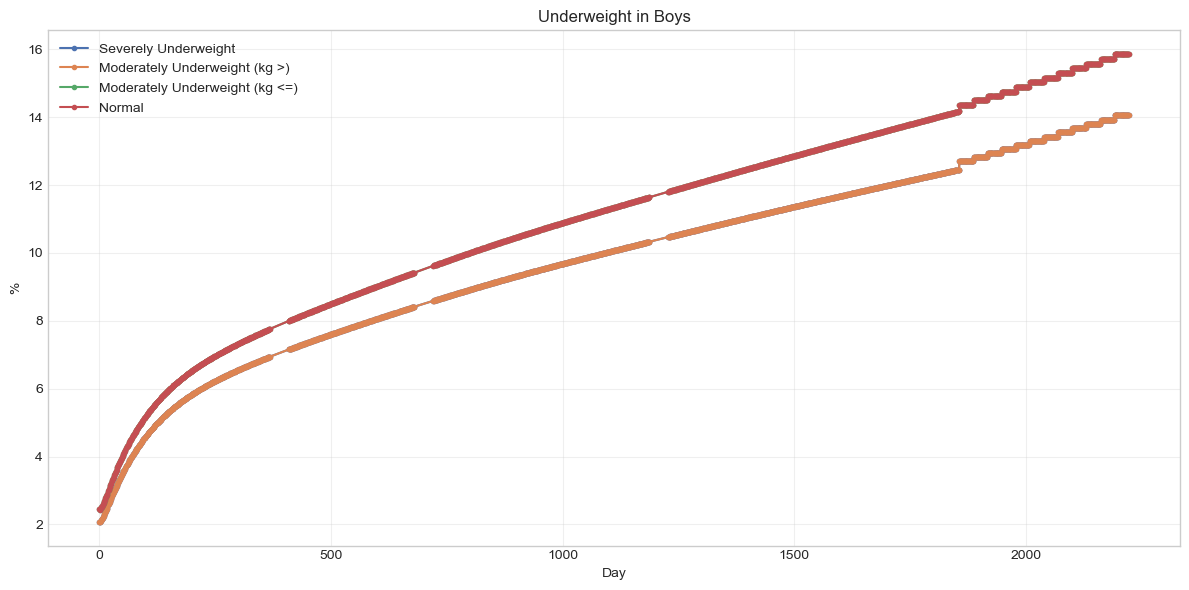


--- Underweight ---
Severely Underweight: Increasing (Significant) (p=0.0000)
Moderately Underweight (kg >): Increasing (Significant) (p=0.0000)
Moderately Underweight (kg <=): Increasing (Significant) (p=0.0000)
Normal: Increasing (Significant) (p=0.0000)


In [10]:
print("\nUnderweight")
under_cols = ['Severely Underweight', 'Moderately Underweight (kg >)', 'Moderately Underweight (kg <=)', 'Normal']
trend_plot(boys_underweight_df, 'Day', under_cols, "Underweight in Boys")
print_trend(boys_underweight_df, 'Day', under_cols, "Underweight")


Wasting


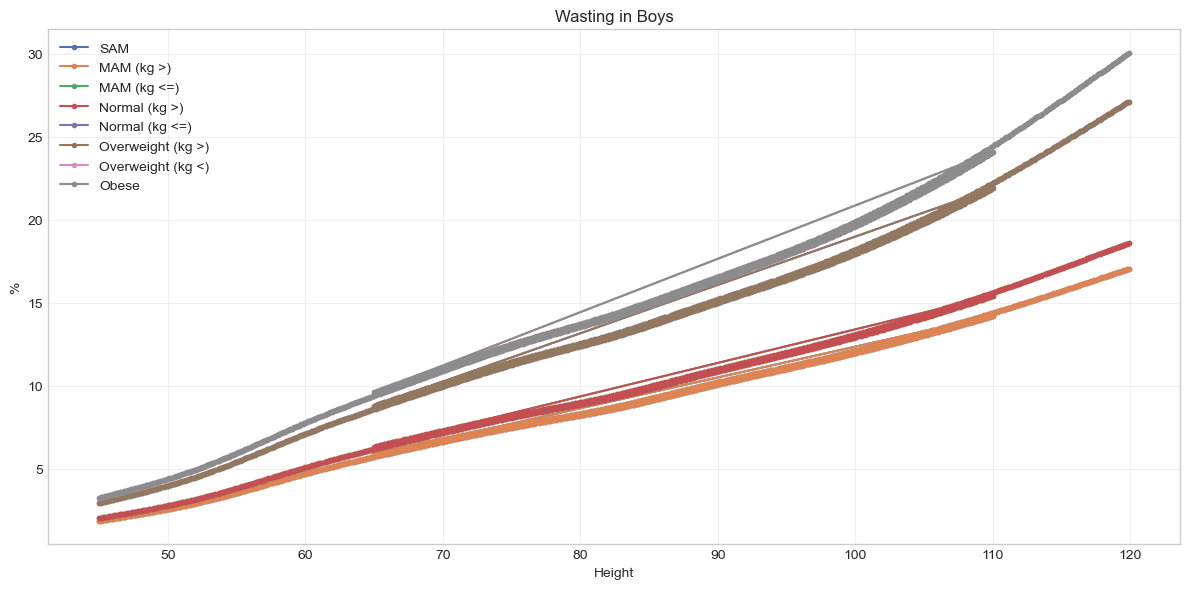


--- Wasting ---
SAM: Increasing (Significant) (p=0.0000)
MAM (kg >): Increasing (Significant) (p=0.0000)
MAM (kg <=): Increasing (Significant) (p=0.0000)
Normal (kg >): Increasing (Significant) (p=0.0000)
Normal (kg <=): Increasing (Significant) (p=0.0000)
Overweight (kg >): Increasing (Significant) (p=0.0000)
Overweight (kg <): Increasing (Significant) (p=0.0000)
Obese: Increasing (Significant) (p=0.0000)


In [11]:
print("\nWasting")
waste_cols = ['SAM', 'MAM (kg >)', 'MAM (kg <=)', 'Normal (kg >)', 'Normal (kg <=)', 'Overweight (kg >)', 'Overweight (kg <)', 'Obese']
trend_plot(boys_wasted_df, 'Height', waste_cols, "Wasting in Boys")
print_trend(boys_wasted_df, 'Height', waste_cols, "Wasting")

In [12]:
boys_stunted_df

,Unnamed: 0,Completed,Day,Severely Stunted,Moderately Stunted (cm >),Moderately Stunted (cm <=),Normal
0,2167,Boys 0-5 years,0.0,44.205,44.205,46.098,46.098
1,2168,Boys 0-5 years,1.0,44.376,44.376,46.271,46.271
2,2169,Boys 0-5 years,2.0,44.547,44.547,46.443,46.443
3,2170,Boys 0-5 years,3.0,44.719,44.719,46.617,46.617
4,2171,Boys 0-5 years,4.0,44.890,44.890,46.789,46.789
...,...,...,...,...,...,...,...
2161,4328,Boys 5-6 years,2218.0,101.171,101.171,106.097,106.097
2162,4329,Boys 5-6 years,2219.0,101.171,101.171,106.097,106.097
2163,4330,Boys 5-6 years,2220.0,101.171,101.171,106.097,106.097
2164,4331,Boys 5-6 years,2221.0,101.171,101.171,106.097,106.097


We can perform predictions using if-elif-else statements because we are already provided with threshold values.

In [ ]:
def calculate_age_days(dob):
    dob_date = datetime.strptime(dob, "%Y-%m-%d").date()
    today = date.today()
    age_days = (today - dob_date).days

    if age_days < 0:
        raise ValueError("Date of birth cannot be in the future")
    
    return age_days


In [14]:
def classify_stunting(age_days, height):
    row = boys_stunted_df.loc[boys_stunted_df['Day'] == age_days]
    thresholds = row.iloc[0]
    if height <= thresholds['Severely Stunted']:
        return 'Severely Stunted'
    elif thresholds['Moderately Stunted (cm >)'] < height <= thresholds["Moderately Stunted (cm <=)"]:
        return 'Moderately Stunted'
    else:
        return 'Normal'

def classify_underweight(age_days, weight):
    row = boys_underweight_df.loc[boys_underweight_df['Day'] == age_days]
    thresholds = row.iloc[0]
    if weight <= thresholds['Severely Underweight']:
        return 'Severely Underweight'
    elif thresholds['Moderately Underweight (kg >)'] < weight <= thresholds["Moderately Underweight (kg <=)"]:
        return 'Moderately Underweight'
    else:
        return 'Normal'

def classify_wasting(age_days, height, weight):
    if age_days < 730:
        completed = "Boy 0-2 Yrs"
    else:
        completed = "Boy 2 - 5 yrs"
    row = boys_wasted_df.loc[
        (boys_wasted_df["Completed"] == completed) & (boys_wasted_df['Height'] == height)
    ]
    thresholds = row.iloc[0]
    if weight <= thresholds['SAM']:
        return 'SAM'
    elif thresholds['MAM (kg >)'] < weight <= thresholds['MAM (kg <=)']:
        return 'MAM'
    elif thresholds['Normal (kg >)'] < weight <= thresholds['Normal (kg <=)']:
        return 'Normal'
    elif thresholds['Overweight (kg >)'] < weight < thresholds['Overweight (kg <)']:
        return 'Overweight'
    else:
        return 'Obese'

In [15]:
def generate_health_report(dob, height, weight):
    age_days = calculate_age_days(pd.Series([dob]))[0]
    report = {
        'Age (Days)': age_days,
        'Stunting': classify_stunting(age_days, height),
        'Underweight': classify_underweight(age_days, weight),
        'Wasting': classify_wasting(age_days, height, weight)
    }
    return report

In [12]:
# take input of birth day, month, year -> format to YYYY-MM-DD format

# dob = "2022-01-15"
# height = 78.5 
# weight = 10.2 

# report = generate_health_report(dob, height, weight)
# print("\n--- Child Health Report (Rule-Based) ---")
# for k, v in report.items():
#     print(f"{k}: {v}")

The problem with using this approach is that we cannot make predictions for people of ages > 5-6 years. So, we will use machine learning to create a model which can do so.

In [16]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

to prepare data we have to convert a Threshold Problem to a Classification Problem

the data we have is in the form of threshold values, which is not suitable for classification algorithms because provides threshold values that define category boundaries, not actual data points with labels. 

What we have: Tables showing "if height ≤ X, then severe; if X < height ≤ Y, then moderate; etc."
What model needs: Data points with features (height, age) and corresponding classification labels

By creating synthetic sample points within each category, we're converting a threshold-based reference table into a proper classification dataset that machine learning algorithms can learn from. Also, this way, we can avoid overfitting.

In [17]:
def prepare_stunting_data(df):
    X = df[['Day']].copy()
    
    sample_heights = []
    for _, row in df.iterrows():
        severe_height = row['Severely Stunted'] * 0.95  # values 5% below threshold
        
        mod_min = row['Moderately Stunted (cm >)']
        mod_max = row['Moderately Stunted (cm <=)']
        mod_height = (mod_min + mod_max) / 2  # average values

        normal_height = row['Normal'] * 1.05  # values 5% above threshold
        
        sample_heights.extend([severe_height, mod_height, normal_height])
    
    expanded_X = pd.DataFrame({
        'Day': np.repeat(df['Day'].values, 3),
        'Height': sample_heights
    })
    
    categories = np.tile(['Severely Stunted', 'Moderately Stunted', 'Normal'], len(df))
    expanded_y = pd.Series(categories)
    
    return expanded_X, expanded_y

In [18]:
def prepare_underweight_data(df):
    X = df[['Day']].copy()
    
    sample_weights = []
    for _, row in df.iterrows():
        severe_weight = row['Severely Underweight'] * 0.95  # values 5% below threshold
        
        mod_min = row['Moderately Underweight (kg >)']
        mod_max = row['Moderately Underweight (kg <=)']
        mod_weight = (mod_min + mod_max) / 2  # average values
        
        normal_weight = row['Normal'] * 1.05  # values 5% above threshold
        
        sample_weights.extend([severe_weight, mod_weight, normal_weight])
    
    expanded_X = pd.DataFrame({
        'Day': np.repeat(df['Day'].values, 3),
        'Weight': sample_weights
    })
    
    categories = np.tile(['Severely Underweight', 'Moderately Underweight', 'Normal'], len(df))
    expanded_y = pd.Series(categories)
    
    return expanded_X, expanded_y

In [19]:
def prepare_wasting_data(df):
    sample_data = []
    categories = []
    
    for _, row in df.iterrows():
        height = row['Height']
        age_group = row['Completed']
        
        sam_weight = row['SAM'] * 0.95  # values 5% below threshold
        sample_data.append([height, sam_weight, age_group])
        categories.append('SAM')
        
        mam_min = row['MAM (kg >)']
        mam_max = row['MAM (kg <=)']
        mam_weight = (mam_min + mam_max) / 2  # average values
        sample_data.append([height, mam_weight, age_group])
        categories.append('MAM')
        
        normal_min = row['Normal (kg >)']
        normal_max = row['Normal (kg <=)']
        normal_weight = (normal_min + normal_max) / 2  # average values
        sample_data.append([height, normal_weight, age_group])
        categories.append('Normal')
        
        over_min = row['Overweight (kg >)']
        over_max = row['Overweight (kg <)']
        over_weight = (over_min + over_max) / 2  # average values
        sample_data.append([height, over_weight, age_group])
        categories.append('Overweight')
        
        obese_weight = row['Obese'] * 1.05  # 5% above threshold
        sample_data.append([height, obese_weight, age_group])
        categories.append('Obese')
    
    sample_df = pd.DataFrame(sample_data, columns=['Height', 'Weight', 'Age_Group'])
    
    # changing string values to numerical, since we just have two labels in 'Age_Group', we can convert to a binary 0 and 1.
    label_encoder = LabelEncoder()
    sample_df['Age_Group_Encoded'] = label_encoder.fit_transform(sample_df['Age_Group'])
    
    expanded_X = sample_df[['Height', 'Weight', 'Age_Group_Encoded']]
    expanded_y = pd.Series(categories)
    
    return expanded_X, expanded_y, label_encoder


In [20]:
# I wanted to analyse and check which model/s are the best. This also helps in revision of / learning about different models.
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

In [ ]:
model_accuracy_df = pd.DataFrame(columns=["model", "stunting", "s_pipeline", "wasting", "w_pipeline", "underweight", "u_pipeline"])
model_list = ["Logistic Regression", "Random Forest", "Gradient Boosting", "SVM", "KNN", "Neural Network"]
model_accuracy_df["model"] = model_list

In [40]:
model_accuracy_df[["s_pipeline", "w_pipeline", "u_pipeline"]] = model_accuracy_df[["s_pipeline", "w_pipeline", "u_pipeline"]].astype(object)


def train_classifiers(X, y, model_type):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, clf in classifiers.items():
        print(f"\n Model: {name}")
        
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', clf)
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        model_accuracy_df.loc[model_accuracy_df["model"] == name, model_type] = accuracy
        row_index = model_accuracy_df.index[model_accuracy_df["model"] == name][0]
        model_accuracy_df.at[row_index, f'{model_type[0]}_pipeline'] = pipeline
        
        print(f"Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        
        # confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=pipeline.classes_, 
                    yticklabels=pipeline.classes_)
        plt.title(f'Confusion Matrix - {name} ({model_type})')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()



===== STUNTING CLASSIFICATION =====

 Model: Logistic Regression
Accuracy: 0.8408
                    precision    recall  f1-score   support

Moderately Stunted       0.79      0.80      0.79       429
            Normal       0.93      0.88      0.90       455
  Severely Stunted       0.80      0.84      0.82       416

          accuracy                           0.84      1300
         macro avg       0.84      0.84      0.84      1300
      weighted avg       0.84      0.84      0.84      1300



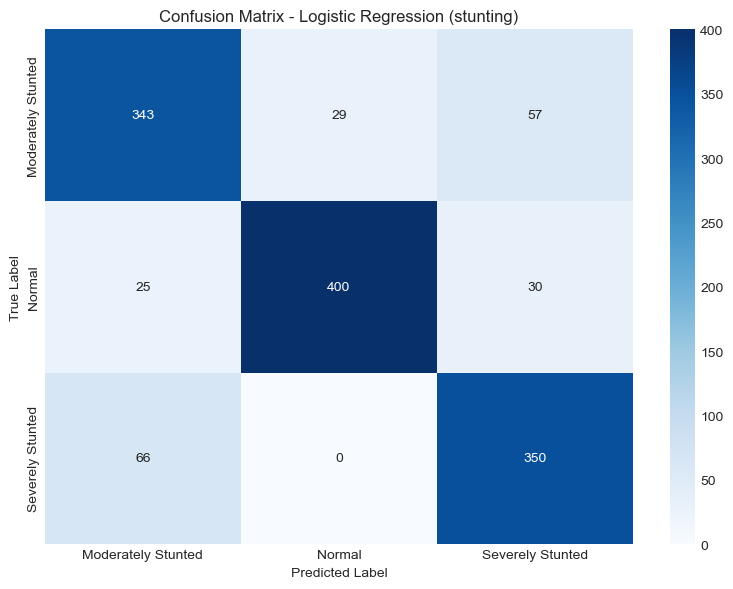


 Model: Random Forest
Accuracy: 1.0000
                    precision    recall  f1-score   support

Moderately Stunted       1.00      1.00      1.00       429
            Normal       1.00      1.00      1.00       455
  Severely Stunted       1.00      1.00      1.00       416

          accuracy                           1.00      1300
         macro avg       1.00      1.00      1.00      1300
      weighted avg       1.00      1.00      1.00      1300



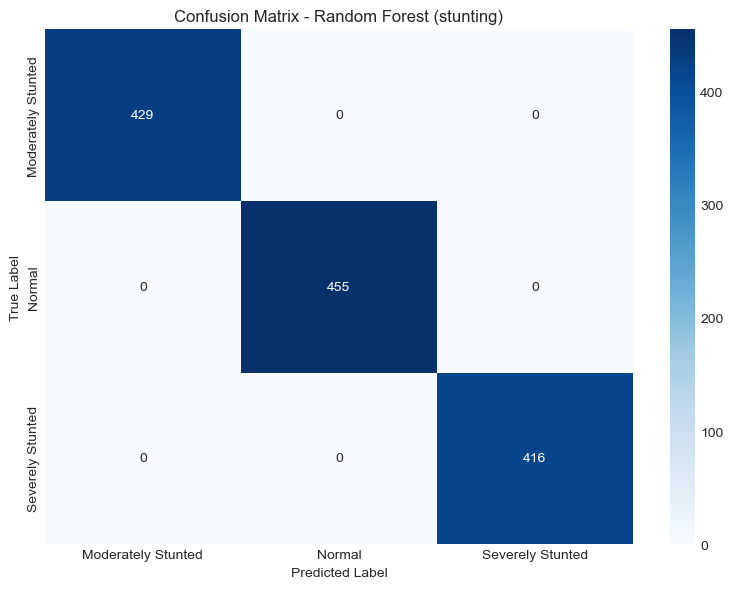


 Model: Gradient Boosting
Accuracy: 0.9938
                    precision    recall  f1-score   support

Moderately Stunted       0.99      0.99      0.99       429
            Normal       1.00      1.00      1.00       455
  Severely Stunted       0.99      1.00      0.99       416

          accuracy                           0.99      1300
         macro avg       0.99      0.99      0.99      1300
      weighted avg       0.99      0.99      0.99      1300



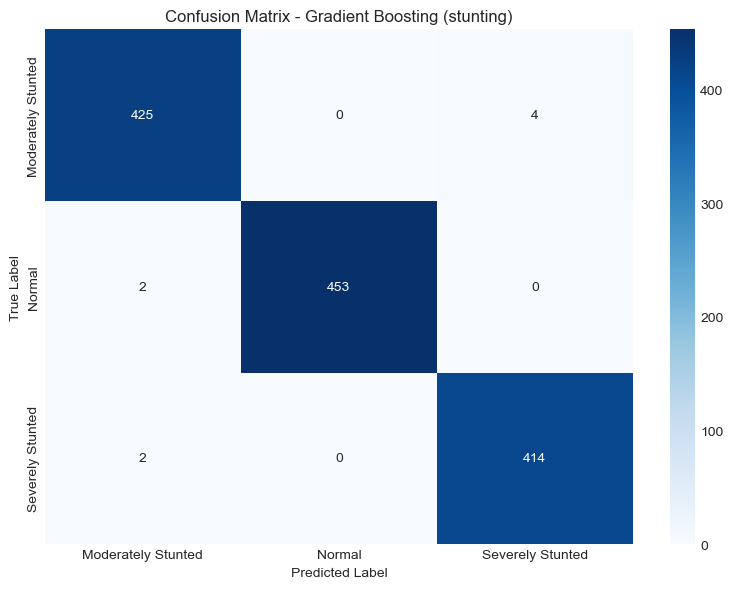


 Model: SVM
Accuracy: 0.9769
                    precision    recall  f1-score   support

Moderately Stunted       0.97      0.97      0.97       429
            Normal       1.00      0.96      0.98       455
  Severely Stunted       0.96      1.00      0.98       416

          accuracy                           0.98      1300
         macro avg       0.98      0.98      0.98      1300
      weighted avg       0.98      0.98      0.98      1300



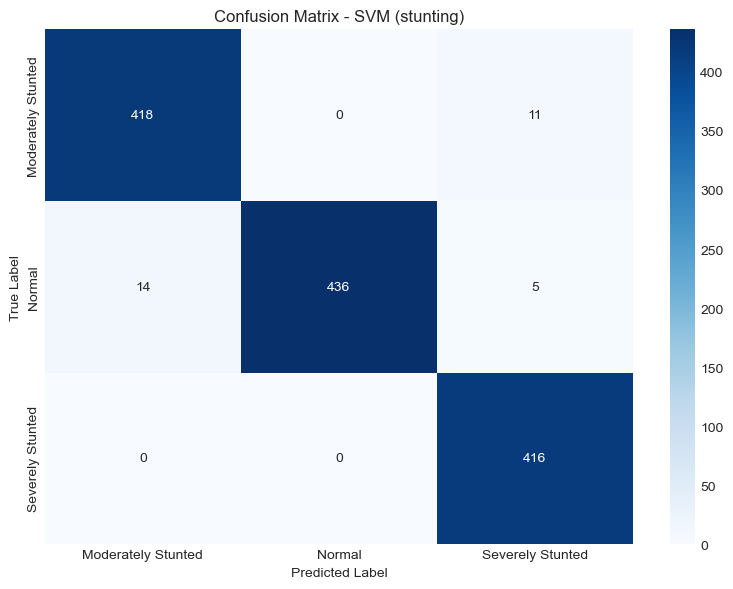


 Model: KNN
Accuracy: 0.9985
                    precision    recall  f1-score   support

Moderately Stunted       1.00      1.00      1.00       429
            Normal       1.00      1.00      1.00       455
  Severely Stunted       1.00      1.00      1.00       416

          accuracy                           1.00      1300
         macro avg       1.00      1.00      1.00      1300
      weighted avg       1.00      1.00      1.00      1300



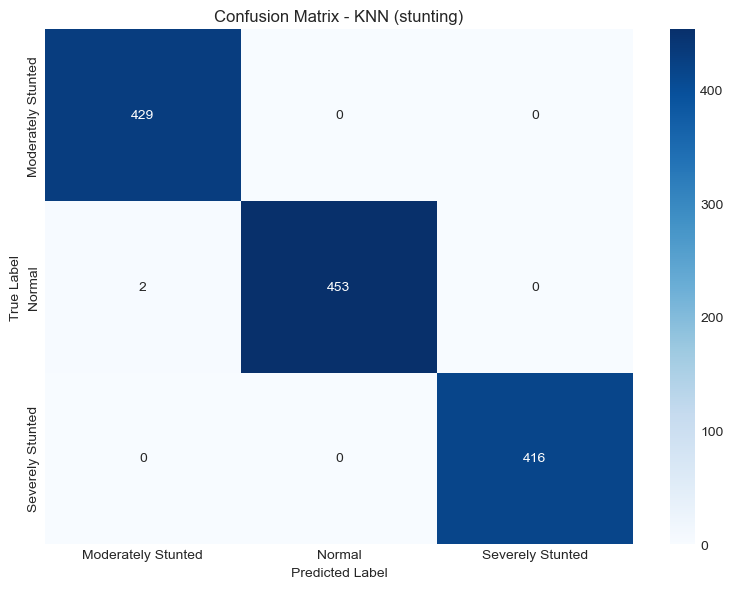


 Model: Neural Network
Accuracy: 1.0000
                    precision    recall  f1-score   support

Moderately Stunted       1.00      1.00      1.00       429
            Normal       1.00      1.00      1.00       455
  Severely Stunted       1.00      1.00      1.00       416

          accuracy                           1.00      1300
         macro avg       1.00      1.00      1.00      1300
      weighted avg       1.00      1.00      1.00      1300



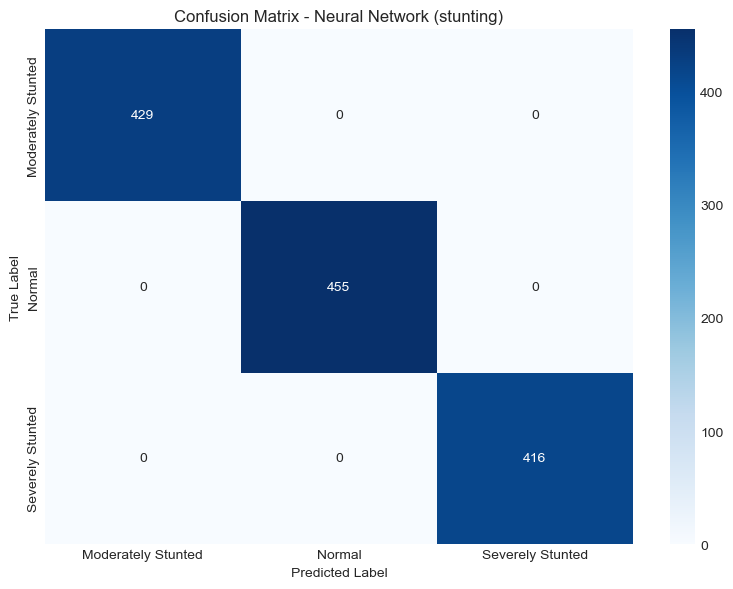

In [41]:
# 1. Stunting Classification
print("\n\n===== STUNTING CLASSIFICATION =====")
stunting_X, stunting_y = prepare_stunting_data(boys_stunted_df)
train_classifiers(stunting_X, stunting_y, 'stunting')



===== UNDERWEIGHT CLASSIFICATION =====

 Model: Logistic Regression
Accuracy: 0.9011
                        precision    recall  f1-score   support

Moderately Underweight       0.86      0.93      0.89       407
                Normal       1.00      0.89      0.94       419
  Severely Underweight       0.85      0.89      0.87       407

              accuracy                           0.90      1233
             macro avg       0.91      0.90      0.90      1233
          weighted avg       0.91      0.90      0.90      1233



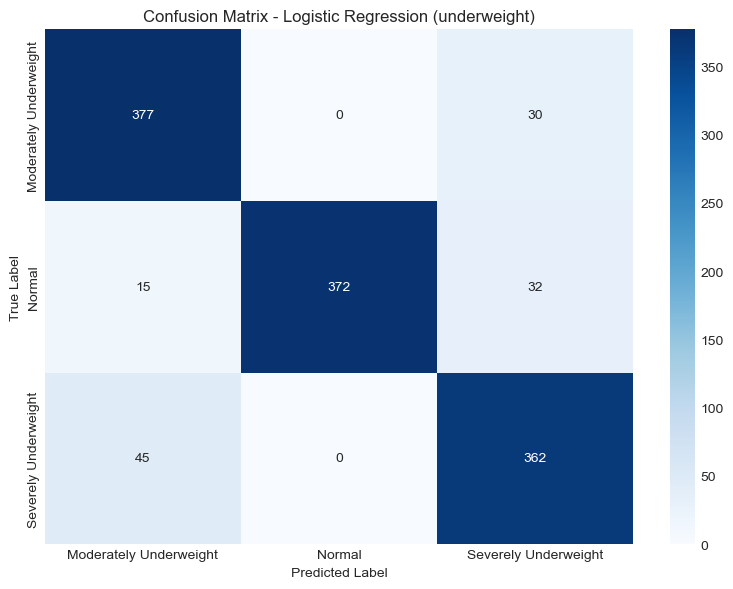


 Model: Random Forest
Accuracy: 1.0000
                        precision    recall  f1-score   support

Moderately Underweight       1.00      1.00      1.00       407
                Normal       1.00      1.00      1.00       419
  Severely Underweight       1.00      1.00      1.00       407

              accuracy                           1.00      1233
             macro avg       1.00      1.00      1.00      1233
          weighted avg       1.00      1.00      1.00      1233



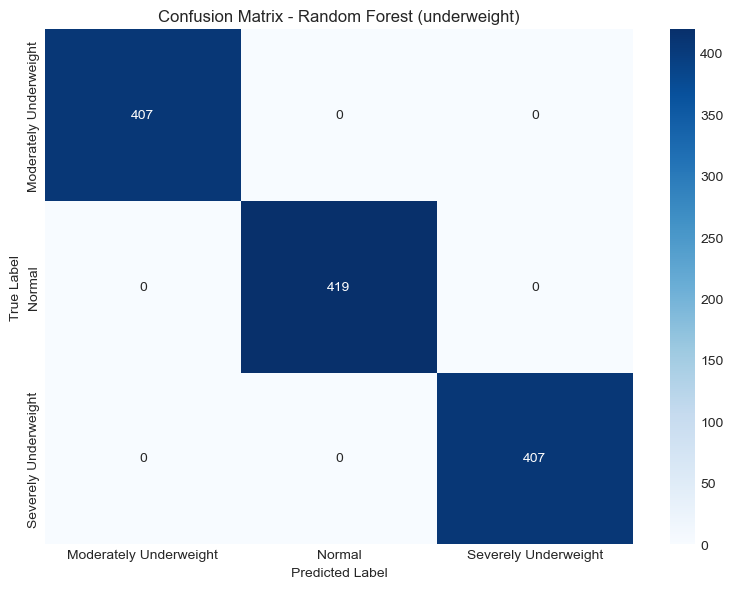


 Model: Gradient Boosting
Accuracy: 0.9773
                        precision    recall  f1-score   support

Moderately Underweight       0.96      0.98      0.97       407
                Normal       0.99      0.96      0.98       419
  Severely Underweight       0.98      0.99      0.99       407

              accuracy                           0.98      1233
             macro avg       0.98      0.98      0.98      1233
          weighted avg       0.98      0.98      0.98      1233



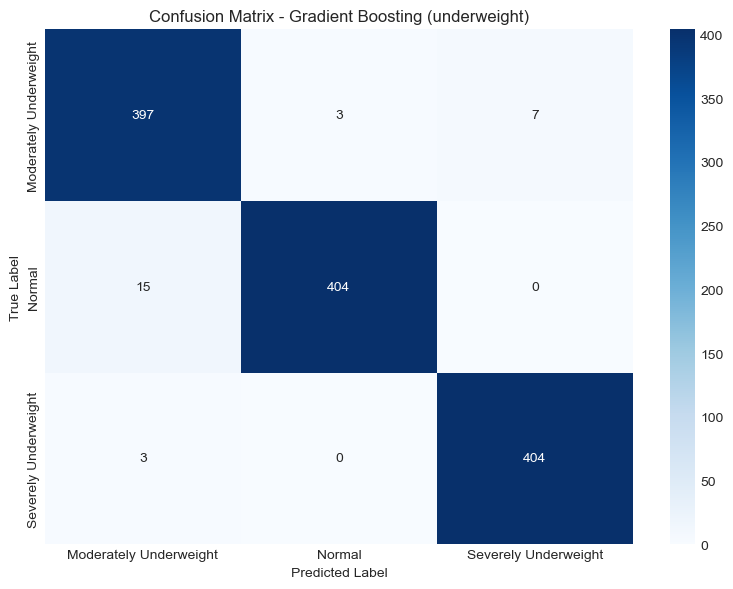


 Model: SVM
Accuracy: 0.9538
                        precision    recall  f1-score   support

Moderately Underweight       0.95      0.94      0.95       407
                Normal       1.00      0.92      0.96       419
  Severely Underweight       0.91      1.00      0.96       407

              accuracy                           0.95      1233
             macro avg       0.96      0.95      0.95      1233
          weighted avg       0.96      0.95      0.95      1233



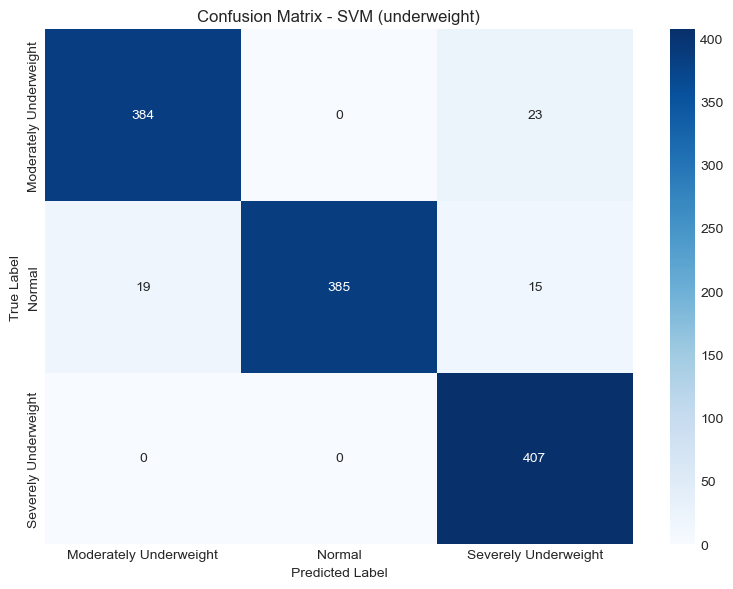


 Model: KNN
Accuracy: 0.9911
                        precision    recall  f1-score   support

Moderately Underweight       0.97      1.00      0.99       407
                Normal       1.00      0.98      0.99       419
  Severely Underweight       1.00      0.99      1.00       407

              accuracy                           0.99      1233
             macro avg       0.99      0.99      0.99      1233
          weighted avg       0.99      0.99      0.99      1233



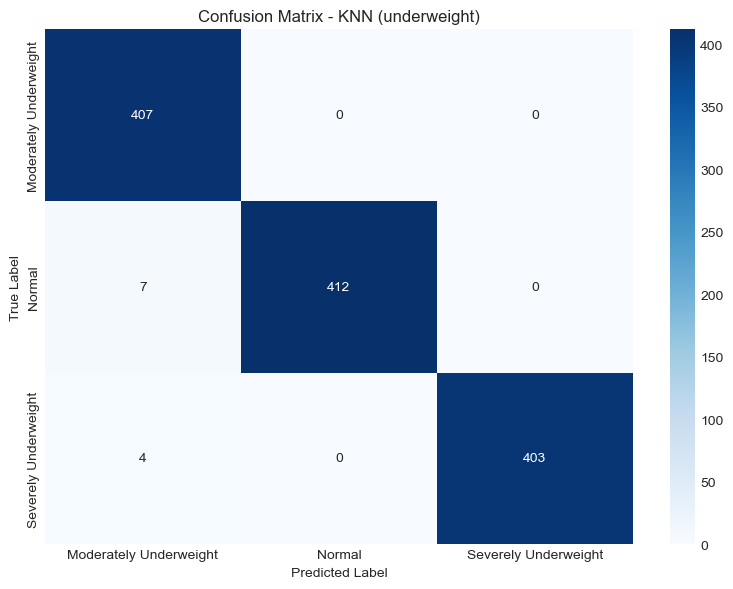


 Model: Neural Network
Accuracy: 1.0000
                        precision    recall  f1-score   support

Moderately Underweight       1.00      1.00      1.00       407
                Normal       1.00      1.00      1.00       419
  Severely Underweight       1.00      1.00      1.00       407

              accuracy                           1.00      1233
             macro avg       1.00      1.00      1.00      1233
          weighted avg       1.00      1.00      1.00      1233



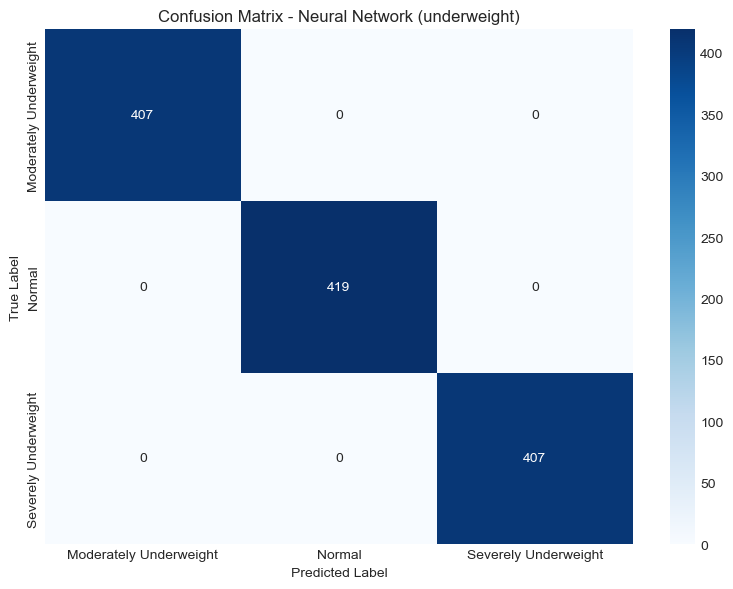

In [42]:
# 2. Underweight Classification
print("\n\n===== UNDERWEIGHT CLASSIFICATION =====")
underweight_X, underweight_y = prepare_underweight_data(boys_underweight_df)
train_classifiers(underweight_X, underweight_y, 'underweight')



===== WASTING CLASSIFICATION =====

 Model: Logistic Regression
Accuracy: 0.9351
              precision    recall  f1-score   support

         MAM       0.98      0.91      0.94       229
      Normal       1.00      1.00      1.00       240
       Obese       0.82      1.00      0.90       232
  Overweight       1.00      0.79      0.88       244
         SAM       0.92      0.98      0.95       226

    accuracy                           0.94      1171
   macro avg       0.94      0.94      0.93      1171
weighted avg       0.94      0.94      0.93      1171



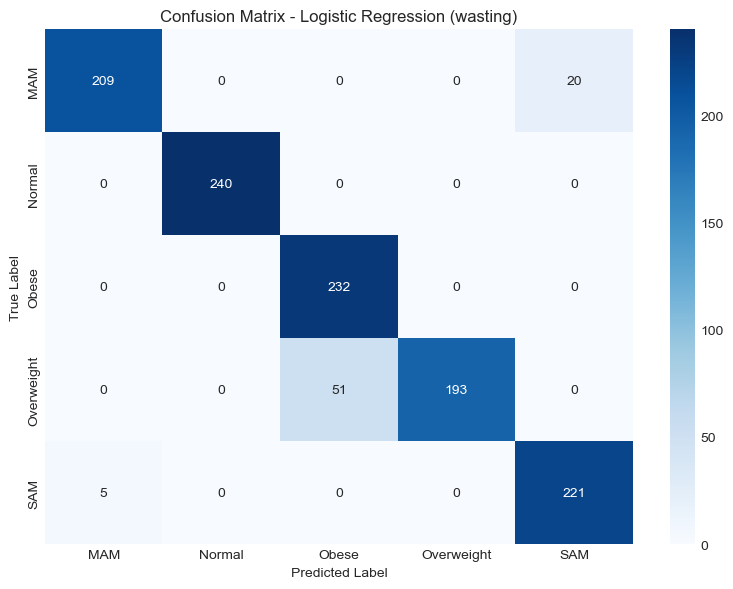


 Model: Random Forest
Accuracy: 0.9966
              precision    recall  f1-score   support

         MAM       0.99      0.99      0.99       229
      Normal       1.00      1.00      1.00       240
       Obese       1.00      1.00      1.00       232
  Overweight       1.00      1.00      1.00       244
         SAM       0.99      0.99      0.99       226

    accuracy                           1.00      1171
   macro avg       1.00      1.00      1.00      1171
weighted avg       1.00      1.00      1.00      1171



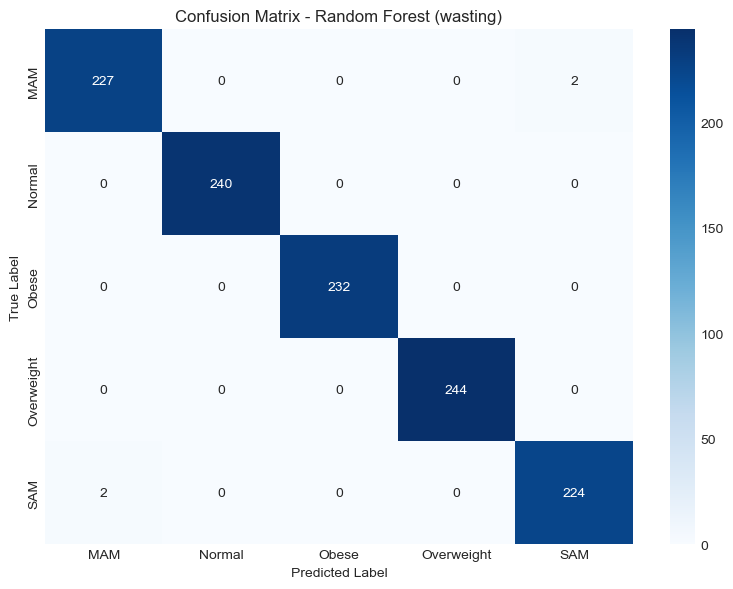


 Model: Gradient Boosting
Accuracy: 0.9342
              precision    recall  f1-score   support

         MAM       0.95      0.90      0.92       229
      Normal       0.97      0.98      0.98       240
       Obese       0.94      0.92      0.93       232
  Overweight       0.91      0.91      0.91       244
         SAM       0.90      0.96      0.93       226

    accuracy                           0.93      1171
   macro avg       0.93      0.93      0.93      1171
weighted avg       0.93      0.93      0.93      1171



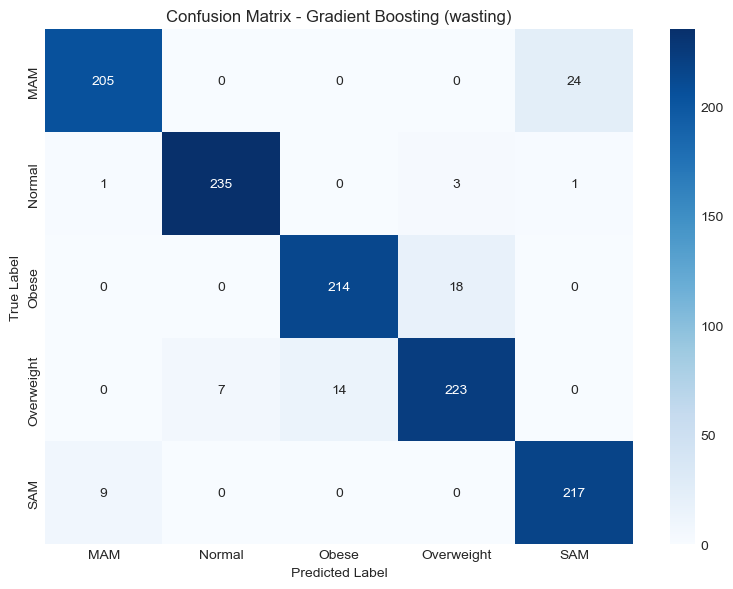


 Model: SVM
Accuracy: 0.9436
              precision    recall  f1-score   support

         MAM       1.00      0.85      0.92       229
      Normal       1.00      1.00      1.00       240
       Obese       1.00      0.87      0.93       232
  Overweight       0.89      1.00      0.94       244
         SAM       0.87      1.00      0.93       226

    accuracy                           0.94      1171
   macro avg       0.95      0.94      0.94      1171
weighted avg       0.95      0.94      0.94      1171



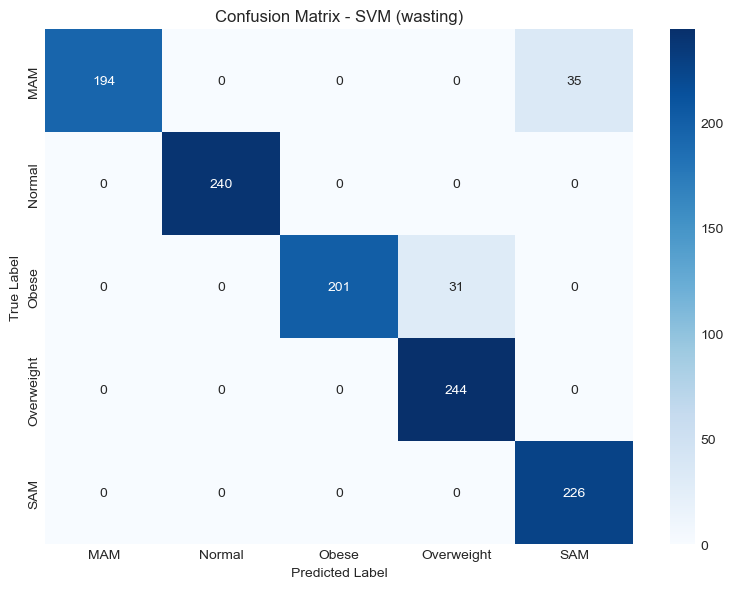


 Model: KNN
Accuracy: 1.0000
              precision    recall  f1-score   support

         MAM       1.00      1.00      1.00       229
      Normal       1.00      1.00      1.00       240
       Obese       1.00      1.00      1.00       232
  Overweight       1.00      1.00      1.00       244
         SAM       1.00      1.00      1.00       226

    accuracy                           1.00      1171
   macro avg       1.00      1.00      1.00      1171
weighted avg       1.00      1.00      1.00      1171



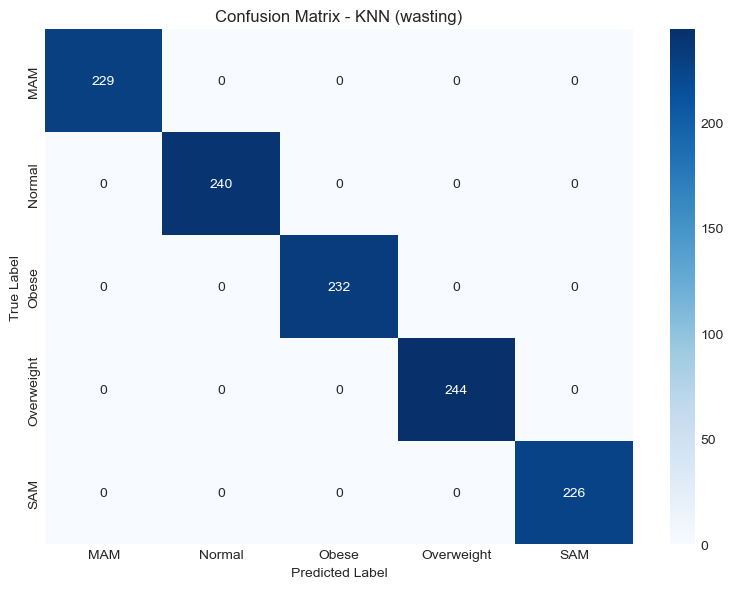


 Model: Neural Network
Accuracy: 0.9957
              precision    recall  f1-score   support

         MAM       0.98      1.00      0.99       229
      Normal       1.00      1.00      1.00       240
       Obese       1.00      1.00      1.00       232
  Overweight       1.00      1.00      1.00       244
         SAM       1.00      0.98      0.99       226

    accuracy                           1.00      1171
   macro avg       1.00      1.00      1.00      1171
weighted avg       1.00      1.00      1.00      1171



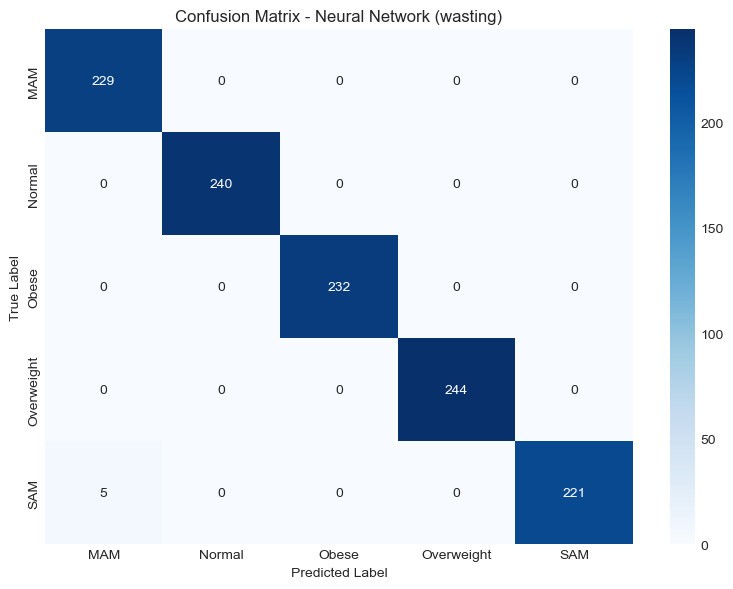

In [43]:
# 3. Wasting Classification
print("\n\n===== WASTING CLASSIFICATION =====")
wasting_X, wasting_y, age_encoder = prepare_wasting_data(boys_wasted_df)
train_classifiers(wasting_X, wasting_y, 'wasting')

In [44]:
model_accuracy_df

,model,stunting,s_pipeline,wasting,w_pipeline,underweight,u_pipeline
0,Logistic Regression,0.840769,"(StandardScaler(), LogisticRegression(max_iter...",0.935098,"(StandardScaler(), LogisticRegression(max_iter...",0.901054,"(StandardScaler(), LogisticRegression(max_iter..."
1,Random Forest,1.0,"(StandardScaler(), (DecisionTreeClassifier(max...",0.996584,"(StandardScaler(), (DecisionTreeClassifier(max...",1.0,"(StandardScaler(), (DecisionTreeClassifier(max..."
2,Gradient Boosting,0.993846,"(StandardScaler(), ([DecisionTreeRegressor(cri...",0.934244,"(StandardScaler(), ([DecisionTreeRegressor(cri...",0.977291,"(StandardScaler(), ([DecisionTreeRegressor(cri..."
3,SVM,0.976923,"(StandardScaler(), SVC(probability=True, rando...",0.943638,"(StandardScaler(), SVC(probability=True, rando...",0.953771,"(StandardScaler(), SVC(probability=True, rando..."
4,KNN,0.998462,"(StandardScaler(), KNeighborsClassifier())",1.0,"(StandardScaler(), KNeighborsClassifier())",0.991079,"(StandardScaler(), KNeighborsClassifier())"
5,Neural Network,1.0,"(StandardScaler(), MLPClassifier(max_iter=1000...",0.99573,"(StandardScaler(), MLPClassifier(max_iter=1000...",1.0,"(StandardScaler(), MLPClassifier(max_iter=1000..."


now that we have stored the accuracy results of each model for each category of malnutrition, to select the 2 best performing model from these, then create a prediction pipeline of these two models.

model calling, cross comparison -> which is giving better o/p

In [52]:
for col in ["stunting", "wasting", "underweight"]:
    model_accuracy_df[col] = pd.to_numeric(model_accuracy_df[col], errors='coerce')

stunting_top_models = model_accuracy_df.nlargest(2, "stunting")[["model", "stunting", "s_pipeline"]]
wasting_top_models = model_accuracy_df.nlargest(2, "wasting")[["model", "wasting", "w_pipeline"]]
underweight_top_models = model_accuracy_df.nlargest(2, "underweight")[["model", "underweight", "u_pipeline"]]


now, we will create an ensemble pipeline of these two models.

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

def build_ensemble_pipeline(top_models_df, target_prefix):
    pipe1 = top_models_df.iloc[0][f"{target_prefix}_pipeline"]
    pipe2 = top_models_df.iloc[1][f"{target_prefix}_pipeline"]

    clf1 = pipe1.named_steps['classifier']
    clf2 = pipe2.named_steps['classifier']

    ensemble_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('voting', VotingClassifier(
            estimators=[('clf1', clf1), ('clf2', clf2)],
            voting='soft'
        ))
    ])
    return ensemble_pipeline

In [54]:
stunting_ensemble = build_ensemble_pipeline(stunting_top_models, "s")
wasting_ensemble = build_ensemble_pipeline(wasting_top_models, "w")
underweight_ensemble = build_ensemble_pipeline(underweight_top_models, "u")

In [55]:
def evaluate_ensemble(ensemble_pipeline, X, y, label_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    ensemble_pipeline.fit(X_train, y_train)
    y_pred = ensemble_pipeline.predict(X_test)
    
    print(f"\nEnsemble Accuracy for {label_name}: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=ensemble_pipeline.named_steps['voting'].classes_,
                yticklabels=ensemble_pipeline.named_steps['voting'].classes_)
    plt.title(f'Confusion Matrix - Ensemble ({label_name.capitalize()})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()



Ensemble Accuracy for stunting: 1.0000
                    precision    recall  f1-score   support

Moderately Stunted       1.00      1.00      1.00       429
            Normal       1.00      1.00      1.00       455
  Severely Stunted       1.00      1.00      1.00       416

          accuracy                           1.00      1300
         macro avg       1.00      1.00      1.00      1300
      weighted avg       1.00      1.00      1.00      1300



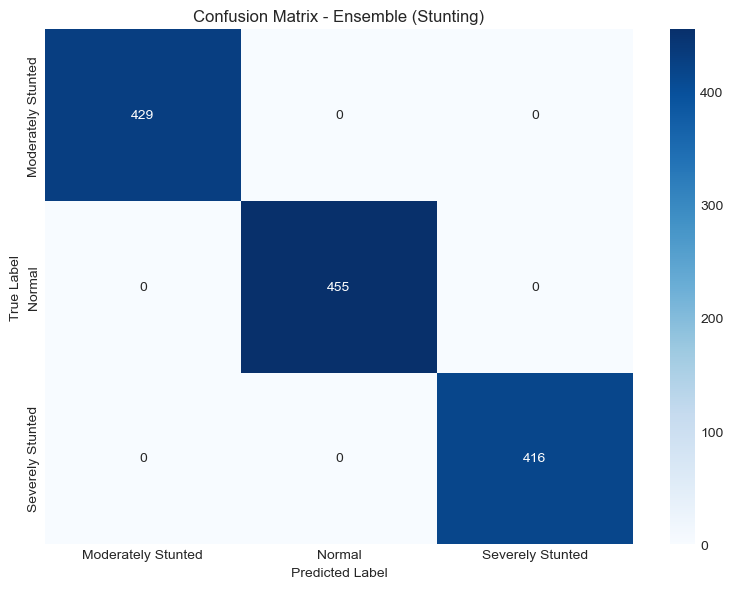


Ensemble Accuracy for wasting: 1.0000
              precision    recall  f1-score   support

         MAM       1.00      1.00      1.00       229
      Normal       1.00      1.00      1.00       240
       Obese       1.00      1.00      1.00       232
  Overweight       1.00      1.00      1.00       244
         SAM       1.00      1.00      1.00       226

    accuracy                           1.00      1171
   macro avg       1.00      1.00      1.00      1171
weighted avg       1.00      1.00      1.00      1171



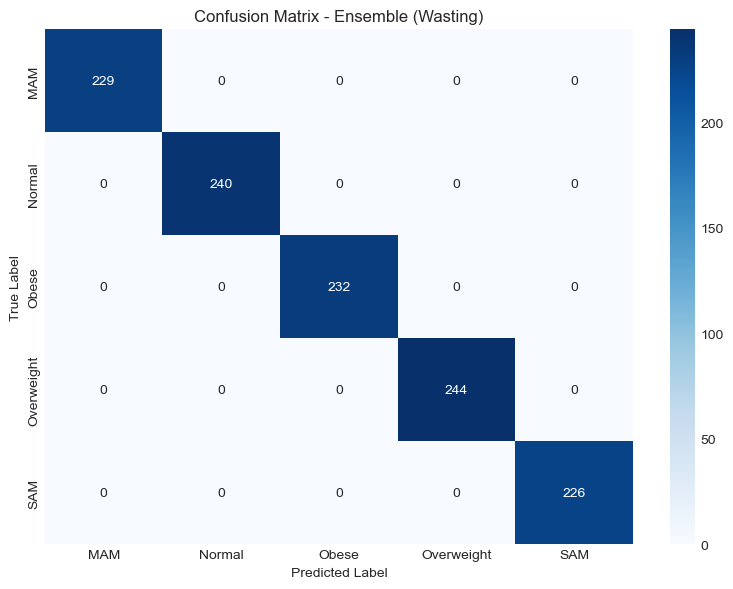


Ensemble Accuracy for underweight: 1.0000
                        precision    recall  f1-score   support

Moderately Underweight       1.00      1.00      1.00       407
                Normal       1.00      1.00      1.00       419
  Severely Underweight       1.00      1.00      1.00       407

              accuracy                           1.00      1233
             macro avg       1.00      1.00      1.00      1233
          weighted avg       1.00      1.00      1.00      1233



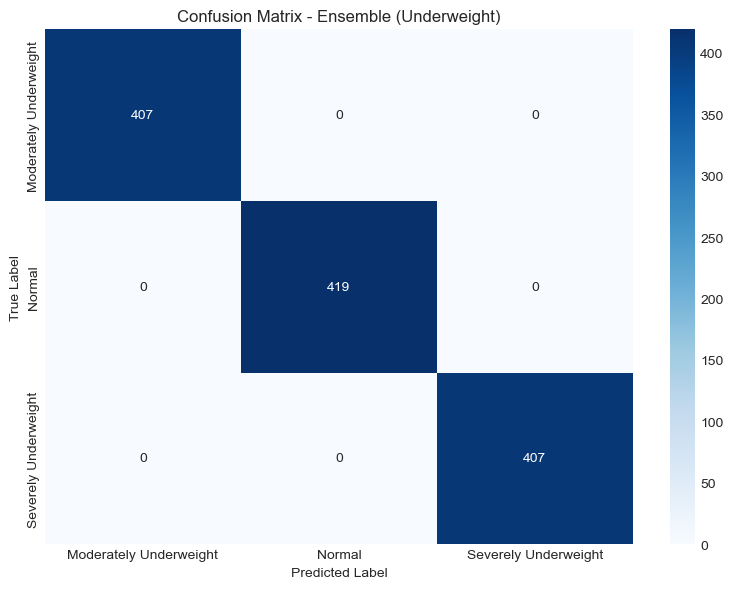

In [56]:
evaluate_ensemble(stunting_ensemble, stunting_X, stunting_y, "stunting")
evaluate_ensemble(wasting_ensemble, wasting_X, wasting_y, "wasting")
evaluate_ensemble(underweight_ensemble, underweight_X, underweight_y, "underweight")

In [59]:
def generate_recommendations(result):
    recommendations = []
    
    stunting = result['ML Predictions']['Stunting']
    underweight = result['ML Predictions']['Underweight']
    wasting = result['ML Predictions']['Wasting']
    
    # Common recommendations
    recommendations.append("Regular monitoring of growth parameters")
    
    # Age-specific recommendations
    age_years = result['Personal']['Age (years)']
    if age_years <= 5:
        recommendations.append("Ensure child receives age-appropriate nutrition")
        recommendations.append("Follow pediatrician's guidance for growth monitoring")
    elif age_years <= 10:
        recommendations.append("Maintain balanced diet with adequate protein and micronutrients")
        recommendations.append("Encourage regular physical activity appropriate for age")
    else:
        recommendations.append("Maintain balanced nutrition suitable for adolescent development")
        recommendations.append("Regular physical activity and sports participation is recommended")
    
    # Issue-specific recommendations
    issues = []
    if stunting != 'Normal':
        issues.append(stunting + " (height-for-age)")
        recommendations.append("Ensure adequate protein and micronutrient intake")
    
    if underweight != 'Normal':
        issues.append(underweight + " (weight-for-age)")
        recommendations.append("Consider increasing caloric intake with nutrient-dense foods")
    
    if wasting not in ['Normal', 'Unable to classify']:
        issues.append(wasting + " (weight-for-height)")
        if wasting in ['SAM', 'MAM']:
            recommendations.append("Immediate medical evaluation recommended")
            recommendations.append("Consider therapeutic feeding program if available")
        elif wasting in ['Overweight', 'Obese']:
            recommendations.append("Consider dietary modifications focusing on balanced nutrition")
            recommendations.append("Increase physical activity while maintaining adequate nutrition")
    
    # Add medical consultation recommendation if issues detected
    if issues:
        recommendations.insert(0, f"Consult healthcare provider regarding: {', '.join(issues)}")
    
    return recommendations

In [71]:
def predict_malnutrition_for_any_age(dob, height, weight):
    try:
        # Step 1: Age calculation
        age_days = calculate_age_days(dob)
        age_years = round(age_days / 365.25, 2)
        
        result = {
            'Personal': {
                'DOB': dob,
                'Age (days)': age_days,
                'Age (years)': age_years,
                'Height (cm)': height,
                'Weight (kg)': weight
            },
            'ML Predictions': {},
            'Confidence': {},
            'Rule-based': {},
            'Recommendations': {}
        }

        # Stunting
        stunting_input = pd.DataFrame({
            'Day': [age_days],
            'Height': [height]
        })
        stunting_prediction = stunting_ensemble.predict(stunting_input)[0]
        stunting_proba = stunting_ensemble.predict_proba(stunting_input)[0]
        stunting_confidence = stunting_proba[np.where(stunting_ensemble.named_steps['voting'].classes_ == stunting_prediction)[0][0]]
        result['ML Predictions']['Stunting'] = stunting_prediction
        result['Confidence']['Stunting'] = f"{stunting_confidence:.2%}"

        # Underweight
        underweight_input = pd.DataFrame({
            'Day': [age_days],
            'Weight': [weight]
        })
        underweight_prediction = underweight_ensemble.predict(underweight_input)[0]
        underweight_proba = underweight_ensemble.predict_proba(underweight_input)[0]
        underweight_confidence = underweight_proba[np.where(underweight_ensemble.named_steps['voting'].classes_ == underweight_prediction)[0][0]]
        result['ML Predictions']['Underweight'] = underweight_prediction
        result['Confidence']['Underweight'] = f"{underweight_confidence:.2%}"

        # Wasting
        age_group_encoded = 0 if age_days < 730 else 1
        wasting_input = pd.DataFrame({
            'Height': [height],
            'Weight': [weight],
            'Age_Group_Encoded': [age_group_encoded]
        })
        wasting_prediction = wasting_ensemble.predict(wasting_input)[0]
        wasting_proba = wasting_ensemble.predict_proba(wasting_input)[0]
        wasting_confidence = wasting_proba[np.where(wasting_ensemble.named_steps['voting'].classes_ == wasting_prediction)[0][0]]
        result['ML Predictions']['Wasting'] = wasting_prediction
        result['Confidence']['Wasting'] = f"{wasting_confidence:.2%}"

        result['Recommendations'] = generate_recommendations(result)

        print("\nPERSONAL DETAILS")
        for key, val in result['Personal'].items():
            print(f"  {key:15}: {val}")

        print("\nMODEL PREDICTIONS")
        for key in ['Stunting', 'Underweight', 'Wasting']:
            print(f"  {key:15}: {result['ML Predictions'][key]}  ({result['Confidence'][key]} confidence)")

        
        print("\nRECOMMENDATIONS")
        for i, rec in enumerate(result['Recommendations'], 1):
            print(f"  {i}. {rec}")

        return result

    except Exception as e:
        return {'Error': str(e)}


In [70]:
# YYYY-MM-DD
result = predict_malnutrition_for_any_age("2005-07-06", 185, 78)


PERSONAL DETAILS
  DOB            : 2005-07-06
  Age (days)     : 7294
  Age (years)    : 19.97
  Height (cm)    : 185
  Weight (kg)    : 78

ML PREDICTIONS
  Stunting       : Normal  (53.63% confidence)
  Underweight    : Normal  (98.00% confidence)
  Wasting        : Obese  (95.00% confidence)

RECOMMENDATIONS
  1. Consult healthcare provider regarding: Obese (weight-for-height)
  2. Regular monitoring of growth parameters
  3. Maintain balanced nutrition suitable for adolescent development
  4. Regular physical activity and sports participation is recommended
  5. Consider dietary modifications focusing on balanced nutrition
  6. Increase physical activity while maintaining adequate nutrition
